<a href="https://colab.research.google.com/github/ahitagnied/deep-learning/blob/main/01-deep-neural-networks/012-cnn/cnn_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Implemending a CNN using PyTorch

### Prepare MNIST Data

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
# Data Preprocessing
transform = transforms.ToTensor()

train = datasets.MNIST(root='/mnist_data', train=True, download=True, transform=transform)
test = datasets.MNIST(root='/mnist_data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 32.7MB/s]


Extracting /mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to /mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.26MB/s]


Extracting /mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to /mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.4MB/s]


Extracting /mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.58MB/s]

Extracting /mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /mnist_data/MNIST/raw



In [3]:
# Create batch sizes of 10
train_loader = DataLoader(train, batch_size=10, shuffle='True')
test_loader = DataLoader(test, batch_size=10, shuffle='False')

# CNN Model
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1) # Gives out Image: 6, 1, 26, 26; 28-3+1 = 26 -> max pool -> 6, 1, 13, 13
    self.conv2 = nn.Conv2d(6, 16, 3, 1) # Image: 13-3+1=11; 16, 1, 11, 11 -> max pool -> 16, 1, 5, 5
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 60)
    self.fc3 = nn.Linear(60, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2) # 2x2 kernel, stride = 2
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2) # 2x2 kernel, stride = 2

    # Reshape into a column vector
    x = x.view(-1, 16*5*5)

    # Dense Layer
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    return x


In [6]:
# Create Model
torch.manual_seed(40)
n = CNN()

# Learning Rate
lr = 0.001

# Loss Function
lf = nn.CrossEntropyLoss()
opt = torch.optim.Adam(n.parameters(), lr)

In [7]:
import time
start = time.time()

# Track loss
epochs = 2
trainl = []

# For each epoch
for i in range(epochs):
  # Train
  for b, (x, y) in enumerate(train_loader):
    y_pred = n(x)
    loss = lf(y_pred, y)

    opt.zero_grad() # Set all grads to 0 to be updated after BP

    # BP
    loss.backward()
    opt.step() # Update weights

    # Updates
    if b%1000 == 0:
      print(f"Epoch: {i}, Batch: {b}, Training Loss: {loss.item()}")
      trainl.append(loss.item())

end = time.time()
total = end - start
print(f"Time taken: {total}")

Epoch: 0, Batch: 0, Training Loss: 2.3198745250701904
Epoch: 0, Batch: 1000, Training Loss: 0.502090573310852
Epoch: 0, Batch: 2000, Training Loss: 0.16022777557373047
Epoch: 0, Batch: 3000, Training Loss: 0.12845169007778168
Epoch: 0, Batch: 4000, Training Loss: 0.1453227698802948
Epoch: 0, Batch: 5000, Training Loss: 0.0016330620273947716
Epoch: 1, Batch: 0, Training Loss: 0.0016360139707103372
Epoch: 1, Batch: 1000, Training Loss: 0.08351545035839081
Epoch: 1, Batch: 2000, Training Loss: 0.21594469249248505
Epoch: 1, Batch: 3000, Training Loss: 0.005539056845009327
Epoch: 1, Batch: 4000, Training Loss: 0.01715340092778206
Epoch: 1, Batch: 5000, Training Loss: 0.03869563341140747
Time taken: 110.64871573448181


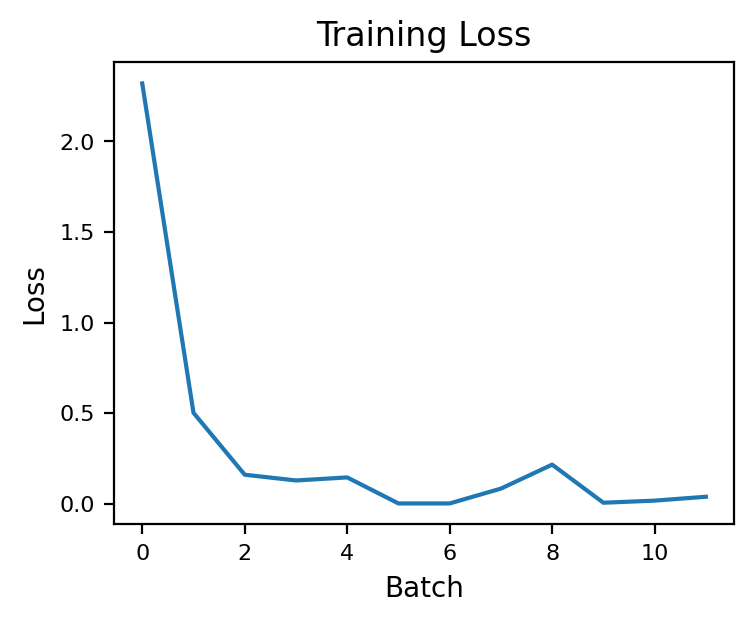

Batch: 0, Testing Loss: 0.00013357705029193312
Batch: 100, Testing Loss: 4.6699864469701424e-05
Batch: 200, Testing Loss: 0.000987155712209642
Batch: 300, Testing Loss: 0.0015499619767069817
Batch: 400, Testing Loss: 0.0011525541776791215
Batch: 500, Testing Loss: 0.002367983106523752
Batch: 600, Testing Loss: 0.006639258004724979
Batch: 700, Testing Loss: 0.020423198118805885
Batch: 800, Testing Loss: 0.05326796695590019
Batch: 900, Testing Loss: 0.05564747378230095


In [8]:
# Plot Training Loss
plt.figure(figsize=(4, 3), dpi=200)
plt.plot(trainl)
plt.xticks(fontsize=8); plt.yticks(fontsize=8)
plt.title("Training Loss")
plt.xlabel("Batch", fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.show()

# Testing
with torch.no_grad():
  for b, (x, y) in enumerate(test_loader):
    y_pred = n(x)
    loss = lf(y_pred, y)

    if b%100 == 0:
      print(f"Batch: {b}, Testing Loss: {loss.item()}")

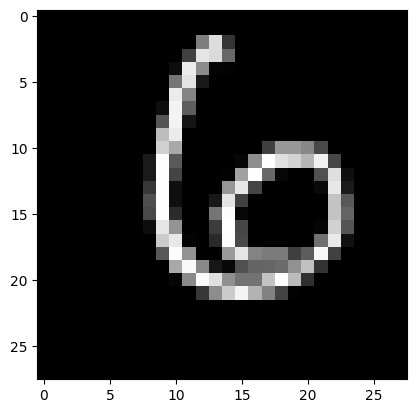

In [14]:
x = test[100][0].reshape(28, 28)
plt.imshow(x, cmap='gray')
plt.show()

In [15]:
# Predict the outcome
n.eval()
with torch.no_grad():
  y_pred = n(test[100][0].reshape(1, 1, 28, 28))
  print(torch.argmax(y_pred))

tensor(6)
